In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns',100)

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Projects by SS/Telecom Domain/Telecom.xlsx')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# duplicated values
df.duplicated().sum()

0

In [ ]:
# Null value check
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: >

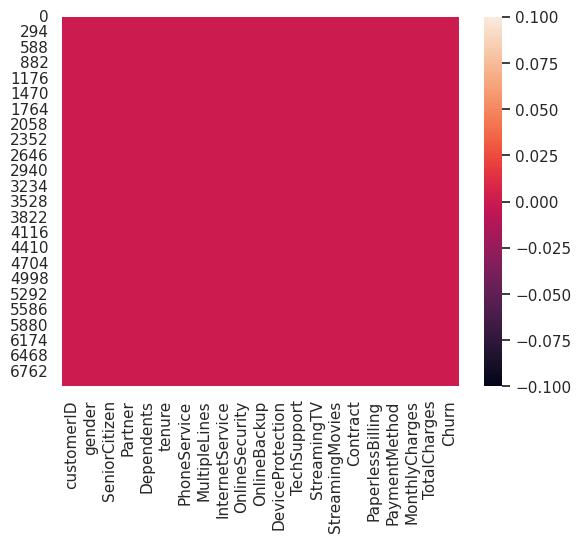

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
# Understanding Dataset variables
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- Here we getting only 3 numerical columns though we have TotalCharges column which is only numerical data

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# convert Totalcharges from object to int:
# df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

- Unable to parse string " " at position 488
- which mean there is a space string present
- here we can fix this by 2 things:
  1. coerce='error'
  2. replace

In [ ]:
for i in df.columns:
  print('****************',i,
        '***********')
  print()
  print(set(df[i].tolist())) # set so that we only get the unique values in list format

**************** customerID ***********

{'8468-EHYJA', '4451-RWASJ', '7078-NVFAM', '3258-SANFR', '1116-DXXDF', '2229-VWQJH', '7439-DKZTW', '9236-NDUCW', '5243-SAOTC', '6203-HBZPA', '3799-ISUZQ', '6728-CZFEI', '0929-HYQEW', '9506-UXUSK', '9738-QLWTP', '1024-KPRBB', '5032-MIYKT', '6429-SHBCB', '1154-HYWWO', '0620-XEFWH', '1803-BGNBD', '1991-VOPLL', '1395-WSWXR', '7919-ZODZZ', '6323-AYBRX', '1768-HNVGJ', '9680-NIAUV', '8461-EFQYM', '6463-MVYRY', '7799-DSEWS', '5777-KJIRB', '5843-TTHGI', '5539-TMZLF', '4159-NAAIX', '4640-UHDOS', '8000-REIQB', '1403-GYAFU', '5393-HJZSM', '3966-HRMZA', '7601-GNDYK', '5712-PTIWW', '7128-GGCNO', '5176-LDKUH', '1271-SJBGZ', '3746-EUBYR', '3363-EWLGO', '5039-LZRQT', '8329-GWVPJ', '0187-QSXOE', '3096-GKWEB', '8189-XRIKE', '7252-NTGSS', '7632-MNYOY', '2065-MMKGR', '0396-HUJBP', '6772-WFQRD', '8740-CRYFY', '6097-EQISJ', '4526-RMTLL', '5753-QQWPW', '2049-BAFNW', '2439-QKJUL', '7301-ABVAD', '9101-BWFSS', '3413-BMNZE', '9518-RWHZL', '4250-FDVOU', '1407-DIGZV', '6024-

- This way we are not able to locate the space string, so going with next solution


In [ ]:
# converting totat charges object to numerical datatype
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

- It is working now, let's check dtype of this column now

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
 df.isnull().sum()/len(df)*100

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

<Axes: ylabel='TotalCharges'>

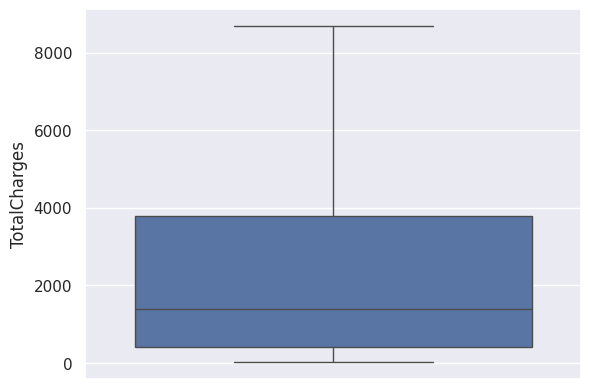

In [ ]:
sns.boxplot(y='TotalCharges', data=df)

- no outliers so we can go with mean to fill the NaN values

In [ ]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [ ]:
# # we can also go with KNN imputation method
# from sklearn.impute import KNNImputer #simpleimputer
# imputer = KNNImputer()
# df_imputed = pd.DataFrame(imputer.fit_transform(df['TotalCharges']), columns=df.columns)
# df_imputed.isnull.sum()

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# check unique values for Each Variables

for i in df.columns:
    print('No of Unique values in ', i, 'is', df[i].nunique())

No of Unique values in  customerID is 7043
No of Unique values in  gender is 2
No of Unique values in  SeniorCitizen is 2
No of Unique values in  Partner is 2
No of Unique values in  Dependents is 2
No of Unique values in  tenure is 73
No of Unique values in  PhoneService is 2
No of Unique values in  MultipleLines is 3
No of Unique values in  InternetService is 3
No of Unique values in  OnlineSecurity is 3
No of Unique values in  OnlineBackup is 3
No of Unique values in  DeviceProtection is 3
No of Unique values in  TechSupport is 3
No of Unique values in  StreamingTV is 3
No of Unique values in  StreamingMovies is 3
No of Unique values in  Contract is 3
No of Unique values in  PaperlessBilling is 2
No of Unique values in  PaymentMethod is 4
No of Unique values in  MonthlyCharges is 1585
No of Unique values in  TotalCharges is 6531
No of Unique values in  Churn is 2


- LabelEncoder can only used in liner and logistic when only 2 unique values there (M or F, 0 or 1)


##### Data Wrangling

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
print("No of customer churning :", df[df['Churn']=='Yes'].Churn.count())
Churn_df = df[df['Churn']=='Yes']
print("No of unique MultipleLines: ", df['MultipleLines'].nunique())

print("No of customer with internet service: ", df[df['InternetService']=='DSL']['InternetService'].count())

print("No of user with  PhoneServices: ", df[df['PhoneService']=='Yes']['PhoneService'].count())
Churn_df

No of customer churning : 1869
No of unique MultipleLines:  3
No of customer with internet service:  2421
No of user with  PhoneServices:  6361


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [ ]:
# Percentage of total cx churning
print('Total no of cx :', df.Churn.count())
perc_Churn = (len(Churn_df)/len(df))*100
perc_Churn

print(f"percentage of cx churning :{round(perc_Churn, 2)}%")

Total no of cx : 7043
percentage of cx churning :26.54%


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# let's check Senior Citizen column: where 0 means not a SC and 1 mean A SC
df['SeniorCitizen'].value_counts()*100/len(df)


0    83.785319
1    16.214681
Name: SeniorCitizen, dtype: float64

In [ ]:
df['Partner'].value_counts()*100/len(df)


No     51.69672
Yes    48.30328
Name: Partner, dtype: float64

In [ ]:
df['Dependents'].value_counts()*100/len(df)


No     70.041176
Yes    29.958824
Name: Dependents, dtype: float64

In [ ]:
df['Churn'].value_counts()*100/len(df)


No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

- As we can see, It is an imbalance dataset

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

- customerID is not so significant here

In [ ]:
df['Churn'] = np.where(df['Churn']=='Yes',1,0)

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [ ]:
x = df.iloc[:, 0:-1] # without churn column
y = df.iloc[:, -1]   # only Churn column

In [ ]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [ ]:
x.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [ ]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [ ]:
# wherever binary variables are there, it will convert them to 0-1.
x = pd.get_dummies(x, columns=[ 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'], drop_first=True)

In [ ]:
x.shape

(7043, 31)

In [ ]:
x.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
x= x.drop('customerID', axis=1)
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2265.000258,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000
50%,0.000000,29.000000,70.350000,1400.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


#### Feature Scaling
- for columns : tenure,  MonthlyCharges, TotalCharges
- Because these varibale have more than just binary values (0,1). As these varibales min and max not lying bw 0 and 1

In [ ]:
# x[scaler_x] mean it will change values only for scaler_x columns and not for whole x
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_x = ['tenure', 'MonthlyCharges', 'TotalCharges']
x[scaler_x] = scaler.fit_transform(x[scaler_x])

In [ ]:
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.994971,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0.066327,-0.259629,-0.173876,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,-1.236724,-0.362660,-0.960399,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0.514251,-0.746535,-0.195400,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,-1.236724,0.197365,-0.941193,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.340876,0.665992,-0.129281,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7039,0,1.613701,1.277533,2.242808,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0
7040,0,-0.870241,-1.168632,-0.855182,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7041,1,-1.155283,0.320338,-0.872777,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


#### Feature engineering method along with Model Building

In [ ]:
# Finding out the most important variable:
from sklearn.ensemble import RandomForestClassifier
rf_lable = RandomForestClassifier()
rf_lable.fit(x,y)
df1 = pd.DataFrame({'Feature' : x.columns, "RF_importance": rf_lable.feature_importances_}).sort_values(by='RF_importance', ascending=False)
df1

,Feature,RF_importance
3,TotalCharges,0.197494
1,tenure,0.173094
2,MonthlyCharges,0.168229
10,InternetService_Fiber optic,0.039276
28,PaymentMethod_Electronic check,0.038871
25,Contract_Two year,0.029787
4,gender_Male,0.027988
26,PaperlessBilling_Yes,0.025418
19,TechSupport_Yes,0.024219
5,Partner_Yes,0.023750


- First 3 column giving us total 51 percent importance!

In [ ]:
# Lets try the same with Gradient Boosting Classifier / variable importance

from sklearn.ensemble import GradientBoostingClassifier
GB_lable = GradientBoostingClassifier()
GB_lable.fit(x,y)
df2 = pd.DataFrame({'Feature' : x.columns, "GB_importance": GB_lable.feature_importances_}).sort_values(by='GB_importance', ascending=False)
df2

,Feature,GB_importance
1,tenure,0.305269
10,InternetService_Fiber optic,0.196804
28,PaymentMethod_Electronic check,0.104687
25,Contract_Two year,0.080170
3,TotalCharges,0.068893
2,MonthlyCharges,0.063626
24,Contract_One year,0.059717
26,PaperlessBilling_Yes,0.019708
13,OnlineSecurity_Yes,0.017252
19,TechSupport_Yes,0.013451


- Both models giving us few contradictions though made it clear that varibale like 'DeviceProtection_No internet service'	 is least importance i both models.

In [ ]:
# Lets check the varibale importance using Descision Tree

from sklearn.tree import DecisionTreeClassifier
DT_lable = DecisionTreeClassifier()
DT_lable.fit(x,y)
df3 = pd.DataFrame({'Feature' : x.columns, "DT_importance": DT_lable.feature_importances_}).sort_values(by='DT_importance', ascending=False)
df3

,Feature,DT_importance
1,tenure,0.214843
3,TotalCharges,0.209665
2,MonthlyCharges,0.178267
10,InternetService_Fiber optic,0.108313
4,gender_Male,0.028224
28,PaymentMethod_Electronic check,0.026245
5,Partner_Yes,0.020436
0,SeniorCitizen,0.018087
6,Dependents_Yes,0.017374
9,MultipleLines_Yes,0.016634


<!-- # DT : less significant variables

14	OnlineBackup_No internet service	0.000000
16	DeviceProtection_No internet service	0.000000
18	TechSupport_No internet service	0.000000
20	StreamingTV_No internet service	0.000000
11	InternetService_No	0.000000 -->

In [ ]:
# # RF : less significant variables
# 11	InternetService_No	0.004700
# 8	MultipleLines_No phone service	0.004543
# 20	StreamingTV_No internet service	0.004071
# 7	PhoneService_Yes	0.003951
# 22	StreamingMovies_No internet service	0.003850

In [ ]:
## GB : less significant variables
# 11	InternetService_No	0.001200
# 17	DeviceProtection_Yes	0.000543
# 29	PaymentMethod_Mailed check	0.000153
# 18	TechSupport_No internet service	0.000000
# 5	Partner_Yes	0.000000

In [ ]:
## DT : less significant variables

# 7	PhoneService_Yes	0.000773
# 16	DeviceProtection_No internet service	0.000000
# 18	TechSupport_No internet service	0.000000
# 12	OnlineSecurity_No internet service	0.000000
# 22	StreamingMovies_No internet service	0.000000
# 11	InternetService_No	0.000000

- by comparing all model less significant varibale is :
  DeviceProtection_No internet service,

In [ ]:
x = x.drop(['DeviceProtection_No internet service'], axis=1)
x.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.994971,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0.066327,-0.259629,-0.173876,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


- Since it is a clasification problem lets do Imbalance treatment

In [ ]:
# Imbalance treatment

import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x,y)
print('Original value counts : ', y.value_counts())
print('*************** SMOTE Method ******************')
print('After Smote value counts : ', y_smote.value_counts())


Original value counts :  0    5174
1    1869
Name: Churn, dtype: int64
*************** SMOTE Method ******************
After Smote value counts :  0    5174
1    5174
Name: Churn, dtype: int64


#### Split the data into training and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.25, random_state=101, stratify = y_smote)   # stratify = y we use this when we do not want to increase the size and the above smote process not required

#### Traditional ML algorithm
##### RandomForest, XGBoost, LogisticRegression

#### Deep Leaning Algorithm (Advanced Techniques)
##### H20.AI AutoML method - automated method.

In [ ]:
# Tradional Approach:

# 1. RandomForest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

# Evaluation Matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print('**************** Classification Report *****************')
print(classification_report(y_train, y_pred_train))
print('*********************************')
print(classification_report(y_test, y_pred_test))

print('**************** Accuracy_score *****************')
print(accuracy_score(y_train, y_pred_train))
print('*********************************')
print(accuracy_score(y_test, y_pred_test))

**************** Classification Report *****************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3881
           1       1.00      1.00      1.00      3880

    accuracy                           1.00      7761
   macro avg       1.00      1.00      1.00      7761
weighted avg       1.00      1.00      1.00      7761

*********************************
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1293
           1       0.82      0.87      0.85      1294

    accuracy                           0.84      2587
   macro avg       0.84      0.84      0.84      2587
weighted avg       0.84      0.84      0.84      2587

**************** Accuracy_score *****************
0.9987115062491947
*********************************
0.8419018167761886


- Here we getting 100 percent Training and 83 percent test data

In [ ]:
# Cross Validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(rf, x_train, y_train, cv=10)
print(training_accuracy.mean())
print('************************')
print(training_accuracy.max())

0.8322358993750745
************************
0.8494208494208494


In [ ]:
# 2. XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)

# Evaluation Matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print('**************** Classification Report *****************')
print(classification_report(y_train, y_pred_train_xgb))
print('*********************************')
print(classification_report(y_test, y_pred_test_xgb))

print('**************** Accuracy_score *****************')
print(accuracy_score(y_train, y_pred_train_xgb))
print('*********************************')
print(accuracy_score(y_test, y_pred_test_xgb))

**************** Classification Report *****************
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      3881
           1       0.93      0.97      0.95      3880

    accuracy                           0.95      7761
   macro avg       0.95      0.95      0.95      7761
weighted avg       0.95      0.95      0.95      7761

*********************************
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1293
           1       0.80      0.85      0.83      1294

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587

**************** Accuracy_score *****************
0.9484602499677877
*********************************
0.8202551217626595


- In XGB we getting 12 % variance so it is better than RF
- Hence we can do CrossValidation on XGB

### Deep Learning Method
#### MultiLayer Perception Method

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras import Sequential

In [ ]:
x_train.shape

(7761, 29)

In [ ]:
model = Sequential()
model.add(Dense(32, input_shape=(29,), activation='relu')) # 29 independent variable
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # sigmoid for binary class, softmax for multiclass; for regression we use linear;
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # For regression: binary_crossent to mse; accuracy to mae
model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))


Epoch 1/100
243/243 [==============================] - 3s 5ms/step - loss: 0.5210 - accuracy: 0.7486 - val_loss: 0.4727 - val_accuracy: 0.7770
Epoch 2/100
243/243 [==============================] - 3s 13ms/step - loss: 0.4534 - accuracy: 0.7878 - val_loss: 0.4608 - val_accuracy: 0.7862
Epoch 3/100
243/243 [==============================] - 2s 10ms/step - loss: 0.4445 - accuracy: 0.7922 - val_loss: 0.4564 - val_accuracy: 0.7862
Epoch 4/100
243/243 [==============================] - 3s 11ms/step - loss: 0.4383 - accuracy: 0.7949 - val_loss: 0.4592 - val_accuracy: 0.7828
Epoch 5/100
243/243 [==============================] - 3s 14ms/step - loss: 0.4348 - accuracy: 0.7974 - val_loss: 0.4535 - val_accuracy: 0.7870
Epoch 6/100
243/243 [==============================] - 3s 11ms/step - loss: 0.4316 - accuracy: 0.8011 - val_loss: 0.4531 - val_accuracy: 0.7859
Epoch 7/100
243/243 [==============================] - 2s 9ms/step - loss: 0.4288 - accuracy: 0.8017 - val_loss: 0.4538 - val_accuracy: 0

- Training [ loss: 0.3105 - accuracy: 0.8681 ]
- Testing [ val_loss: 0.4512 - val_accuracy: 0.7986 ] . Test is known as validation in DL
- results are good as the difference is only 7% bw acccuracy and va;_accuracy

===========================================

## H2O

- It is an Auto ML Model.
- It is fully distributed with ML, regression, SVM, DL, EventCollection


In [ ]:
# Dependecy packages
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [ ]:
# Now isntall the actual package
!pip install h2o

In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size = '16G') # memory size should be taken less than 78 as per GPU


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,36 mins 16 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_z0i38i
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,15.98 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# Loading the Dataset
dataset = h2o.import_file("/content/drive/MyDrive/Colab Notebooks/Projects by SS/Telecom Domain/Telecom.csv")
dataset.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
dataset.head()

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
# Splitting dataset
df_train, df_test = dataset.split_frame(ratios=[0.8])  # 80 training, 20 testing

In [ ]:
df_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No


In [ ]:
df_test

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.5,2686.05,No
8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
6865-JZNKO,Female,0,No,No,30,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),55.3,1530.6,No
6572-ADKRS,Female,0,No,No,46,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),74.8,3548.3,No
5380-WJKOV,Male,0,No,No,34,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.35,3549.25,Yes
8865-TNMNX,Male,0,Yes,Yes,10,Yes,No,DSL,No,Yes,No,No,No,No,One year,No,Mailed check,49.55,475.7,No
9867-JCZSP,Female,0,Yes,Yes,17,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,418.25,No


In [ ]:
y = 'Churn'  # Dependent Variable
x = dataset.columns
x.remove(y)
x.remove('customerID')  # removing customerID also as it is not required

In [ ]:
x

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

### Building H2O AutoML Model


In [ ]:
aml = H2OAutoML(max_runtime_secs=300, max_models=10, seed=10, verbosity='info', nfolds=2)   # seed = randomState # verbosity : whatever the parameter we have given it is to control them.

In [ ]:
aml.train(x=x, y=y, training_frame = df_train)

AutoML progress: |
17:50:45.192: Project: AutoML_2_20240402_175045
17:50:45.192: Setting stopping tolerance adaptively based on the training frame: 0.013345201011101862
17:50:45.194: Build control seed: 10
17:50:45.195: training frame: Frame key: AutoML_2_20240402_175045_training_py_11_sid_b118    cols: 21    rows: 5615  chunks: 8    size: 277539  checksum: -834116337555751248
17:50:45.195: validation frame: NULL
17:50:45.195: leaderboard frame: NULL
17:50:45.195: blending frame: NULL
17:50:45.195: response column: Churn
17:50:45.195: fold column: null
17:50:45.195: weights column: null
17:50:45.195: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_1 (4g, 30w), grid

key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/5
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# GLM base models (used / total),1/1
# DRF base models (used / total),2/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


In [ ]:
lb = aml.leaderboard
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_2_20240402_175045,0.849895,0.412558,0.662194,0.237113,0.366175,0.134084
StackedEnsemble_AllModels_1_AutoML_2_20240402_175045,0.849478,0.412747,0.664166,0.234527,0.366143,0.134061
GBM_1_AutoML_2_20240402_175045,0.848951,0.413946,0.665214,0.226866,0.366498,0.134321
GLM_1_AutoML_2_20240402_175045,0.845468,0.418083,0.650861,0.234234,0.368623,0.135883
GBM_2_AutoML_2_20240402_175045,0.841617,0.423559,0.650343,0.242788,0.371147,0.13775
XGBoost_1_AutoML_2_20240402_175045,0.83832,0.429503,0.651501,0.247029,0.373814,0.139737
XRT_1_AutoML_2_20240402_175045,0.837756,0.42778,0.644699,0.235885,0.372675,0.138887
GBM_3_AutoML_2_20240402_175045,0.837669,0.428401,0.645487,0.23968,0.373217,0.139291
XGBoost_3_AutoML_2_20240402_175045,0.836917,0.434195,0.64186,0.250266,0.375062,0.140671
GBM_4_AutoML_2_20240402_175045,0.833618,0.434821,0.638202,0.252547,0.376171,0.141505


In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [ ]:
model_ids

['StackedEnsemble_BestOfFamily_1_AutoML_2_20240402_175045',
 'StackedEnsemble_AllModels_1_AutoML_2_20240402_175045',
 'GBM_1_AutoML_2_20240402_175045',
 'GLM_1_AutoML_2_20240402_175045',
 'GBM_2_AutoML_2_20240402_175045',
 'XGBoost_1_AutoML_2_20240402_175045',
 'XRT_1_AutoML_2_20240402_175045',
 'GBM_3_AutoML_2_20240402_175045',
 'XGBoost_3_AutoML_2_20240402_175045',
 'GBM_4_AutoML_2_20240402_175045',
 'DRF_1_AutoML_2_20240402_175045',
 'XGBoost_2_AutoML_2_20240402_175045']

In [ ]:
# Best performer model
aml.leader.model_performance(df_test) # pass the Test data which we taken in starting

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.13574611026823571
RMSE: 0.3684373898890227
LogLoss: 0.4208669973593491
AUC: 0.8357379676260379
AUCPR: 0.6446420834299476
Gini: 0.6714759352520758
Null degrees of freedom: 1427
Residual degrees of freedom: 1422
Null deviance: 1628.43976513395
Residual deviance: 1201.9961444583012
AIC: 1213.9961444583012

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.26765147974902526
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     778   283    0.2667   (283.0/1061.0)
Yes    79    288    0.2153   (79.0/367.0)
Total  857   571    0.2535   (362.0/1428.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.267651     0.614072  226
max f2                       0.166163     0.737999  283
max f0point5                 0.623847     0.625606  77
max accuracy                 0.623847     0.807423  77
max precision                0.894701     1         0
max recall                   0.0070428    1         397
max specificity              0.894701     1         0
max absolute_mcc             0.405002     0.467192  167
max min_per_class_accuracy   0.298753     0.752121  214
max mean_per_class_accuracy  0.208558     0.760078  256
max tns                      0.894701     1061      0
max fns                      0.894701     365       0
max fps                      0.0058248    1061      399
max tps                      0.0070428    367       397
max tnr                      0.894701     1         0
max fnr                      0.894701     0.99455   0
max fpr                      0.0058248    1         399
max tpr                      0.0070428    1         397

Gains/Lift Table: Avg response rate: 25.70 %, avg score: 26.38 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0105042                   0.841799           3.37221    3.37221            0.866667         0.863641    0.866667                    0.863641            0.0354223       0.0354223                  237.221   237.221            0.0335373
2        0.0203081                   0.814259           3.33515    3.35432            0.857143         0.827275    0.862069                    0.846085            0.0326975       0.0681199                  233.515   235.432            0.0643499
3        0.030112                    0.786971           3.33515    3.34808            0.857143         0.799626    0.860465                    0.830959            0.0326975       0.100817                   233.515   234.808            0.0951624
4        0.0406162                   0.759133           3.37221    3.35432            0.866667         0.769128    0.862069                    0.814968            0.0354223       0.13624                    237.221   235.432            0.1287
5        0.0504202                   0.728291           3.33515    3.35059            0.857143         0.740717    0.861111                    0.80053             0.0326975       0.168937                   233.515   235.059            0.159512
6        0.10014                     0.648029           2.79495    3.07471            0.71831          0.687495    0.79021                     0.744408            0.138965        0.307902                   179.495   207.471            0.279627
7        0.15056                     0.581592           1.89146    2.67846            0.486111         0.610698    0.68837

In [ ]:
# Tuning Model
# as we found that Stackedensemble is the best model so taking the same
h2o.get_model([mid for mid in model_ids if 'StackedEnsemble' in mid][0])

key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/5
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# GLM base models (used / total),1/1
# DRF base models (used / total),2/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


- As we can see our paramters gets improved with out crossvalidation or GSearchCV, check the MSE for better understanding
- specificity is reverse of sensitivity

#### saving our model

In [ ]:
y_pred = aml.leader.predict(df_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
y_pred

predict,No,Yes
No,0.746569,0.253431
Yes,0.600294,0.399706
Yes,0.57252,0.42748
No,0.983488,0.0165125
Yes,0.179668,0.820332
No,0.863518,0.136482
No,0.742344,0.257656
Yes,0.411951,0.588049
No,0.87149,0.12851
No,0.969733,0.0302668


---- END ------